<a href="https://colab.research.google.com/github/N-Linh/ML/blob/main/polinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
X = 1 + 8*np.random.rand(100, 1)
y = 0.25*(X**2) - 2*X + 6 + np.random.randn(100, 1)

Text(0, 0.5, '$y$')

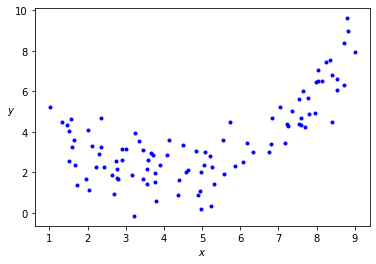

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)

guess degree = 2

In [33]:
X_ones = np.ones((100, 1))
X_squares = X**2
X_com = np.c_[X_ones, X_squares, X]
X_com[0], X_com.shape

(array([ 1.        , 64.57914346,  8.03611495]), (100, 3))

In [36]:
X_pred = 9*np.random.rand(100, 1)
X_pred.shape

(100, 1)

using normal equation

In [49]:
theta = np.dot(np.linalg.pinv(np.dot(X_com.T, X_com)), np.dot(X_com.T, y))
theta, theta.shape

(array([[ 6.26591056],
        [ 0.26232725],
        [-2.14024063]]), (3, 1))

using sklearn

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([6.26591056]), array([[-2.14024063,  0.26232725]]))

In [60]:
X_new=np.linspace(1, 9, 100).reshape(100, 1)#100 value from -3 to 3
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

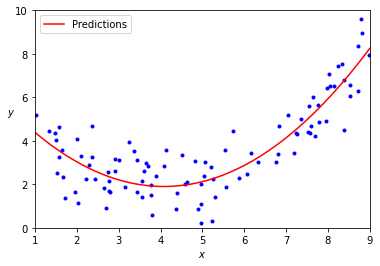

In [64]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-",label="Predictions")
plt.xlabel("$x$",)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([1, 9, 0, 10])
plt.show()

using gradient descent

In [127]:
lr = 0.0006
theta = np.random.randn(3, 1)
iters = 100000
for iter in range(iters):
  grad = 2/100 * np.dot(X_com.T, np.dot(X_com, theta) - y)
  theta = theta - lr*grad
theta

array([[ 6.12934706],
       [ 0.25695454],
       [-2.08089015]])